In [66]:
import pandas as pd

df = pd.read_csv('gene.ngrams', sep=' ', names=['Count', 'NGram', 'One', 'Two', 'Three'])

In [34]:
df

,Count,NGram,One,Two,Three
0,41072,1-GRAM,I-GENE,NaN,NaN
1,345128,1-GRAM,O,NaN,NaN
2,24435,2-GRAM,I-GENE,I-GENE,NaN
3,15888,2-GRAM,O,I-GENE,NaN
4,16624,2-GRAM,I-GENE,O,NaN
5,13783,2-GRAM,O,STOP,NaN
6,13,2-GRAM,I-GENE,STOP,NaN
7,13047,2-GRAM,*,O,NaN
8,315457,2-GRAM,O,O,NaN
9,749,2-GRAM,*,I-GENE,NaN


# Bigrams

In [12]:
from collections import defaultdict

bigram_count = defaultdict(lambda: defaultdict(int))

for count, BIGRAM, tag_one, tag_two, _ in df[df['NGram'] == '2-GRAM'].values.tolist():
    bigram_count[tag_one][tag_two] = count

In [14]:
bigram_count['*']['*']

13796

# Trigrams

In [17]:
from collections import defaultdict

trigram_count = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for count, TRIGRAM, tag_one, tag_two, tag_three in df[df['NGram'] == '3-GRAM'].values.tolist():
    trigram_count[tag_one][tag_two][tag_three] = count

# Compute $q_\text{MLE}$

In [26]:
import itertools
from collections import defaultdict

q = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for next, current, previous in itertools.product(['*', 'STOP', 'O', 'I-GENE'], repeat=3):
    # Ignore situations where the premise is impossible
    if not bigram_count[previous][current]:
        continue
        
    q[next][previous][current] = trigram_count[previous][current][next] / float(bigram_count[previous][current])

# Unigrams

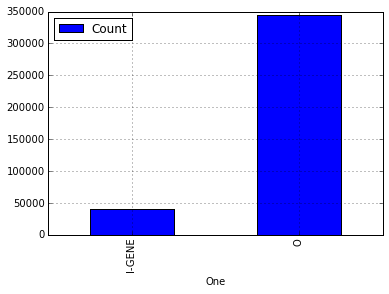

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

df[df['NGram'] == '1-GRAM'].plot(x='One', y='Count', kind='bar')

# Bigrams

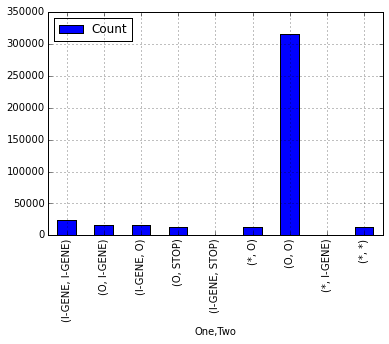

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

df[df['NGram'] == '2-GRAM'].plot(x=['One', 'Two'], y='Count', kind='bar')

# Trigrams

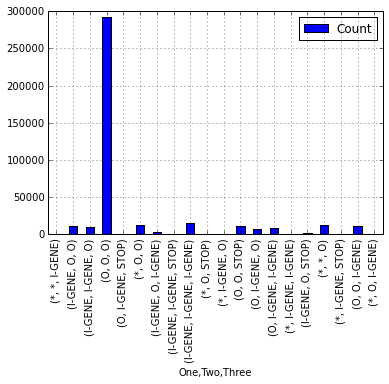

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

df[df['NGram'] == '3-GRAM'].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

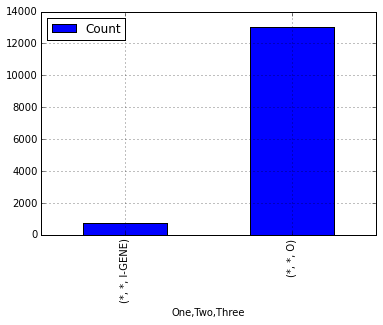

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_one = df['One'] == '*'
star_two = df['Two'] == '*'

df[trigram & star_one & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

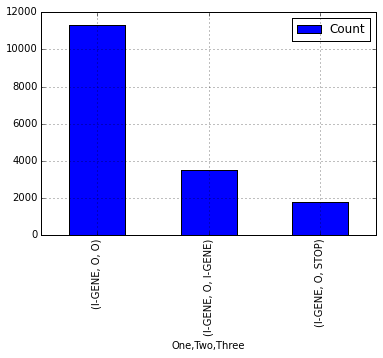

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_one = df['One'] == 'I-GENE'
star_two = df['Two'] == 'O'

df[trigram & star_one & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

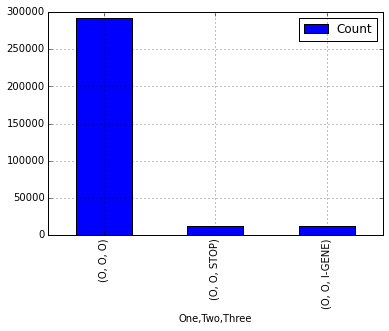

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_one = df['One'] == 'O'
star_two = df['Two'] == 'O'

df[trigram & star_one & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

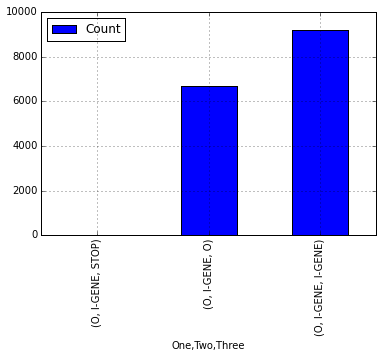

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_one = df['One'] == 'O'
star_two = df['Two'] == 'I-GENE'

df[trigram & star_one & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

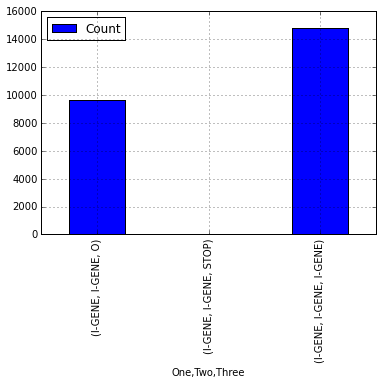

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_one = df['One'] == 'I-GENE'
star_two = df['Two'] == 'I-GENE'

df[trigram & star_one & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')

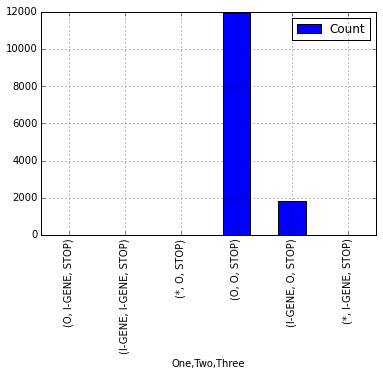

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

trigram = df['NGram'] == '3-GRAM'
star_two = df['Three'] == 'STOP'

df[trigram & star_two].plot(x=['One', 'Two', 'Three'], y='Count', kind='bar')